## Logistic Regression

### Overview

Logistic regression is a a parameterized machine learning algorithm aimed to calssify the classes in the dataset. It can be binary classification or multi class classification. We use different kind of loss function for different type of classification like we use the log loss for the binary classification and softmax for the multi class classification.

### Assumptions of logistic regression

The assumption of logistic regression are not quite strict as linear regression meaning that if we miss one of it, it will not affect very much as linear regression does but the output or the prediction of the linear regression should be hillarious. The asusmptions of logistic regression are given below:

* Binary outcome for binary classification
* Linearity of the logit
    * Logistic regression doesn't require a linear relatinship between the input variables and the output varaibles but it does the linear relationship between the independent variables and the log odds of the output.
* Independent of the observations:
    * The samples should be indpenedent from each other, there should be diversity among the samples like there should not be the clustering of the data e.g. we take the sample of maglinant or benign from the same hospital for the repeated patients.
* No multicollinearity of the samples:
    * There should be no or little multi collinearity of the samples
* Large enough data
    * You need large data for the logistic regression as it uses the maximum likelihood a rule of thumb is that there should be 10 positive classes per features.
* No extreme outliers
* No complete separation:
    * This is when one feature perfectly predicts the outcome (like "if X > 10 → y = 1 always").
    * Model can’t converge, and you'll get warnings or weird coefficient estimates (infinite or undefined).

### Components of logisitc regression

* Input Features (X)
These are your independent variables — the data you feed into the model to make predictions.

Can be numerical, binary, or categorical (need to be encoded).

Each feature gets a coefficient (weight).

* Coefficients (β)
These are the learned weights for each feature during training.

The model tries to learn the best set of coefficients to maximize the likelihood of correct predictions.

Larger coefficients = bigger influence on the prediction.

* Linear Combination (z)
This is the “logit” part:

Logit outputs the 1 vs 0 log(p/(1 - p))

It’s the same idea as linear regression — a straight weighted sum of inputs.

* Sigmoid (Logistic) Function
This is what turns the linear output into a probability between 0 and 1:

​
If the output is closer to 1 → likely class 1

If closer to 0 → likely class 0

Formula:
1 / (1 + e^-z)

Think of it like: linear model + squishing layer = logistic regression.

* Cost Function (Log Loss / Binary Cross-Entropy)
We don’t use MSE like in linear regression. We use log loss, because it's better for classification.

Loss = −[𝑦log⁡(𝑦^) + (1−𝑦)log(1−𝑦^)]

Penalizes the model more for confident wrong predictions.

This is what gets minimized during training.

* Optimization Algorithm
To train the model, we need to minimize the loss. We usually use:

Gradient Descent (batch, mini-batch, or stochastic)

Newton-Raphson or LBFGS (in statsmodels)

These update the coefficients iteratively until the loss is minimized.

* Threshold (for decision)
After you get the probability from sigmoid, you convert it to a class using a threshold (usually 0.5):

Predicted class = {1 if 𝑦^ ≥ 0.5 0 otherwise }
 
You can tweak this based on precision/recall tradeoffs.

* Evaluation Metrics
Unlike regression, we don't use RMSE or R² here.

For classification, common metrics are:

Accuracy

Precision / Recall / F1-score

AUC-ROC

Confusion matrix

### Quick working of logistic regression

* We calculate the log odds i.e. we output 1 vs 0 or spam or not spam log(p/(1-p)). In case of logistic regression it is w.x + b. In logistic regression, we don’t calculate log-odds as log(p / (1 - p)) directly. Instead, we model the log-odds as a linear combination.
* We give this log odds to the sigmoid function that outputs the probability between 0 and 1
* We then calculate the likehlihood, how probable is our data given the parameter. We try to maximize the probability predicted by model should be similar to the actually observed output.
* We calculate the log likelihood because the total likelihood of the model is very small and when we take the log it becomes more prominent. Log turns the product into a sum, which is way easier to deal with in math and gradient optimization

### Logistic regression from scratch

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [40]:
class LogisticRegression():
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Normalize the data
        X_normalized = self.normalize(X)
        
        # Training loop
        for i in range(self.n_iters):
            # Forward pass
            y_pred = self.predict(X_normalized)
            
            # Compute loss
            loss = self.compute_loss(y, y_pred)
            
            # Compute gradients
            dw, db = self.gradient_descent(X_normalized, y, y_pred, n_samples)
            
            # Update weights
            self.update_weights(dw, db)
            
            # Print progress every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i+1}, Loss: {loss:.4f}")

    def normalize(self, X):
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        # Avoid division by zero
        std = np.where(std == 0, 1, std)
        return (X - mean) / std

    def sigmoid(self, z):
        # Clip z to prevent overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)

    def compute_loss(self, y, y_pred):
        # Add small epsilon to prevent log(0)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return np.mean(loss)
    
    def gradient_descent(self, X, y, y_pred, m):
        # Compute gradients using matrix multiplication
        dw = np.dot(X.T, (y_pred - y)) / m
        db = np.sum(y_pred - y) / m
        return dw, db
    
    def update_weights(self, dw, db):
        self.weights -= self.lr * dw
        self.bias -= self.lr * db
    
    def predict_class(self, X):
        # Normalize X using the same parameters as training
        X_normalized = self.normalize(X)
        y_pred = self.predict(X_normalized)
        return [1 if i > 0.5 else 0 for i in y_pred]


In [41]:
from sklearn.datasets import make_classification
import numpy as np

# Generate a random dataset for binary classification
X, y = make_classification(
    n_samples=200,      # number of samples
    n_features=2,       # number of features
    n_informative=2,    # number of informative features
    n_redundant=0,      # number of redundant features
    n_clusters_per_class=1,
    flip_y=0.01,        # small label noise
    class_sep=1.5,      # separation between classes
    random_state=42
)

# Optionally, print shapes to verify
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (200, 2)
y shape: (200,)


In [42]:
logistic_regression = LogisticRegression(lr=0.01, n_iters=1000)
logistic_regression.fit(X, y)

Iteration 1, Loss: 0.6931
Iteration 101, Loss: 0.5604
Iteration 201, Loss: 0.4774
Iteration 301, Loss: 0.4223
Iteration 401, Loss: 0.3834
Iteration 501, Loss: 0.3547
Iteration 601, Loss: 0.3326
Iteration 701, Loss: 0.3152
Iteration 801, Loss: 0.3010
Iteration 901, Loss: 0.2893


In [43]:
# Test the predictions
y_pred_classes = logistic_regression.predict_class(X)
print(f"Predicted classes: {y_pred_classes[:10]}")  # Show first 10 predictions
print(f"Actual classes: {y[:10]}")  # Show first 10 actual values

# Calculate accuracy
accuracy = np.mean(y_pred_classes == y)
print(f"Accuracy: {accuracy:.4f}")

# Get probability predictions
y_pred_proba = logistic_regression.predict(logistic_regression.normalize(X))
print(f"Predicted probabilities: {y_pred_proba[:10]}")  # Show first 10 probabilities

Predicted classes: [0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
Actual classes: [1 1 1 1 1 0 1 0 0 0]
Accuracy: 0.9350
Predicted probabilities: [0.40657065 0.81780921 0.92992932 0.94700997 0.80329784 0.33435044
 0.63707692 0.3875141  0.1437327  0.28931064]


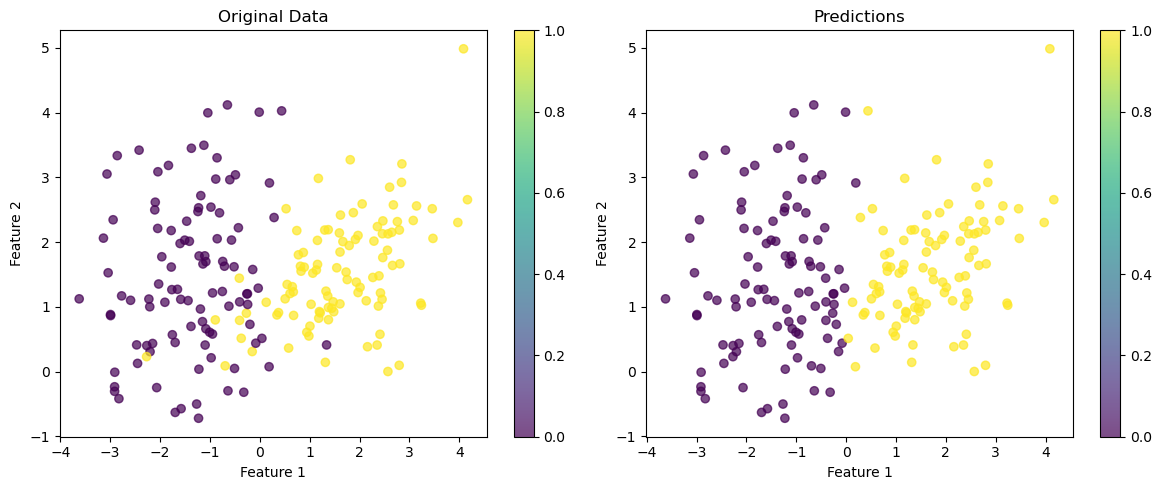

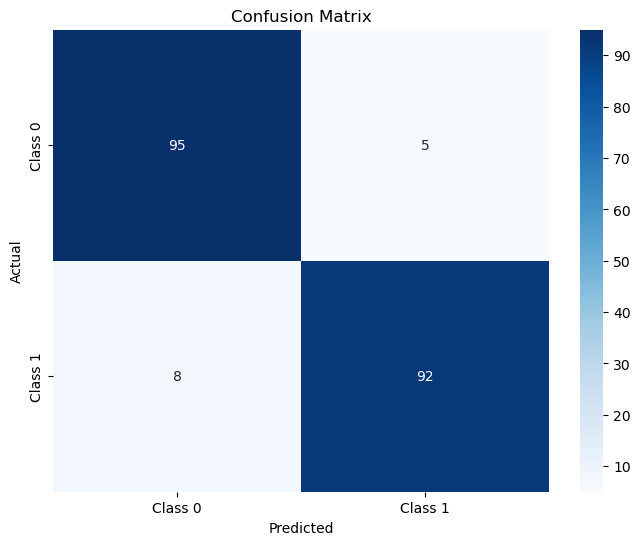


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       100
           1       0.95      0.92      0.93       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.93       200



In [44]:
# Visualize the results
plt.figure(figsize=(12, 5))

# Plot 1: Original data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

# Plot 2: Predictions
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_classes, cmap='viridis', alpha=0.7)
plt.title('Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.tight_layout()
plt.show()

# Create a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y, y_pred_classes))
